# **Waze Project**
**This is a 5 part project from the Google Advanced Data Analytics Certificate from Coursera.**

**The main goal of this project is to predict user churn in the Waze app in order to conrtibute to Waze's retention strategy optimization**

Welcome to the Waze Project!

Your Waze data analytics team is still in the early stages of their user churn project. Previously, you were asked to complete a project proposal by your supervisor, May Santner. You have received notice that your project proposal has been approved and that your team has been given access to Waze's user data. To get clear insights, the user data must be inspected and prepared for the upcoming process of exploratory data analysis (EDA).

A Python notebook has been prepared to guide you through this project. Answer the questions and create an executive summary for the Waze data team.

# **Course 2 End-of-course project: Inspect and analyze data**

In this activity, you will examine data provided and prepare it for analysis. This activity will help ensure the information is,

1.   Ready to answer questions and yield insights

2.   Ready for visualizations

3.   Ready for future hypothesis testing and statistical methods
<br/>

**The purpose** of this project is to investigate and understand the data provided.

**The goal** is to use a dataframe contructed within Python, perform a cursory inspection of the provided dataset, and inform team members of your findings.
<br/>

*This activity has three parts:*

**Part 1:** Understand the situation
* How can you best prepare to understand and organize the provided information?

**Part 2:** Understand the data

* Create a pandas dataframe for data learning, future exploratory data analysis (EDA), and statistical activities

* Compile summary information about the data to inform next steps

**Part 3:** Understand the variables

* Use insights from your examination of the summary data to guide deeper investigation into variables



### Imports and data loading

Start by importing the packages that you will need to load and explore the dataset. Make sure to use the following import statements:

In [2]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import numpy as np
import pandas as pd

Then, load the dataset into a dataframe. Creating a dataframe will help you conduct data manipulation, exploratory data analysis (EDA), and statistical activities.

In [3]:
# Load dataset into dataframe
df = pd.read_csv('waze_dataset.csv')

### Summary information

View and inspect summary information about the dataframe.

In [4]:
### YOUR CODE HERE ###
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


*Consider the following questions:*

1. When reviewing the `df.head()` output, are there any variables that have missing values?

There are no visible missing values when using the head() function to show the first 5 rows of the dataset.

2. When reviewing the `df.info()` output, what are the data types? How many rows and columns do you have?

The data types are: float64(3 columns), int64(8 columns) and object(2 columns).
   In total, the dataset has 14999 rows and 13 columns.
   
3. Does the dataset have any missing values?

There are 700 missing values in the 'label' column.


### Null values and summary statistics

Compare the summary statistics of the 700 rows that are missing labels with summary statistics of the rows that are not missing any values.

In [6]:
# Isolate rows with null values

df_null = df[df['label'].isnull()]
# Display summary stats of rows with null values

df_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [7]:
# Isolate rows without null values

df_not_null = df[~df['label'].isnull()]
# Display summary stats of rows without null values

df_not_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


**Question:** Is there a discernible difference between the two populations?
1. It doesn't seem to be noticable a discernable difference between the two populations. The means and standard deviation seem to be similar.

### ** Null values - device counts**

Next, check the two populations with respect to the `device` variable.

**Question:** How many iPhone users had null values and how many Android users had null values?

In [16]:
# Get count of null values by device
### YOUR CODE HERE ###
df_null['device'].value_counts()

iPhone     447
Android    253
Name: device, dtype: int64

==> There are 447 iPhone null values and 253 Android null values.

Now, of the rows with null values, calculate the percentage with each device&mdash;Android and iPhone. You can do this directly with the [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) function.

In [28]:
# Calculate % of iPhone nulls and Android nulls

null_percentage = (df_null['device'].value_counts())/(len(df_null['device']))*100
print("Percentage of null values:\n{}".format(null_percentage))

Percentage of null values:
iPhone     63.857143
Android    36.142857
Name: device, dtype: float64


How does this compare to the device ratio in the full dataset?

In [31]:
# Calculate % of iPhone users and Android users in full dataset

df['device'].value_counts(normalize=True)

iPhone     0.644843
Android    0.355157
Name: device, dtype: float64

The percentage of missing values by each device is consistent with their representation in the data overall.
There is nothing to suggest a non-random cause of the missing data.

Examine the counts and percentages of users who churned vs. those who were retained. How many of each group are represented in the data?

In [34]:
# Calculate counts of churned vs. retained

print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True))

retained    11763
churned      2536
Name: label, dtype: int64

retained    0.822645
churned     0.177355
Name: label, dtype: float64


This dataset contains 82% retained users and 18% churned users.

Next, compare the medians of each variable for churned and retained users. The reason for calculating the median and not the mean is that you don't want outliers to unduly affect the portrayal of a typical user. Notice, for example, that the maximum value in the `driven_km_drives` column is 21,183 km. That's more than half the circumference of the earth!

In [44]:
# Calculate median values of all columns for churned and retained users

churned = df['label']=='churned'
print('         Churned:\n', df[churned].median())

print()

retained = df['label']=='retained'
print('         Retained:\n', df[retained].median())

         Churned:
 ID                         7477.500000
sessions                     59.000000
drives                       50.000000
total_sessions              164.339042
n_days_after_onboarding    1321.000000
total_navigations_fav1       84.500000
total_navigations_fav2       11.000000
driven_km_drives           3652.655666
duration_minutes_drives    1607.183785
activity_days                 8.000000
driving_days                  6.000000
dtype: float64

         Retained:
 ID                         7509.000000
sessions                     56.000000
drives                       47.000000
total_sessions              157.586756
n_days_after_onboarding    1843.000000
total_navigations_fav1       68.000000
total_navigations_fav2        9.000000
driven_km_drives           3464.684614
duration_minutes_drives    1458.046141
activity_days                17.000000
driving_days                 14.000000
dtype: float64


In [47]:
# Another way to do it
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


This offers an interesting snapshot of the two groups, churned vs. retained:

Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile. Continue exploring!

Calculate the median kilometers per drive in the last month for both retained and churned users.

In [53]:
# Group data by `label` and calculate the medians

median_distance = df.groupby('label').median()['driven_km_drives']
# Divide the median distance by median number of drives

median_drives = df.groupby('label').median()['drives']

median_km_drive = median_distance/median_drives 
median_km_drive

label
churned     73.053113
retained    73.716694
dtype: float64

In [54]:
# Another way to do it
medians_by_label = df.groupby('label').median(numeric_only=True)

medians_by_label['driven_km_drives']/medians_by_label['drives']

label
churned     73.053113
retained    73.716694
dtype: float64

The median user from both groups drove ~73 km/drive. How many kilometers per driving day was this?

In [55]:
# Divide the median distance by median number of driving days

medians_by_label['driven_km_drives']/medians_by_label['driving_days']

label
churned     608.775944
retained    247.477472
dtype: float64

Now, calculate the median number of drives per driving day for each group.

In [56]:
# Divide the median number of drives by median number of driving days

medians_by_label['drives']/medians_by_label['driving_days']

label
churned     8.333333
retained    3.357143
dtype: float64

The median user who churned drove 608 kilometers each day they drove last month, which is almost 250% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data&mdash;and in particular the sample of churned users&mdash;contains a high proportion of long-haul truckers.

In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

Finally, examine whether there is an imbalance in how many users churned by device type.

Begin by getting the overall counts of each device type for each group, churned and retained.

In [68]:
df.groupby(['label','device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

Now, within each group, churned and retained, calculate what percent was Android and what percent was iPhone.

In [72]:
# For each label, calculate the percentage of Android users and iPhone users
### YOUR CODE HERE ###
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: device, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

### **Task 3. Conclusion**

Recall that your supervisor, asked you to share your findings with the data team in an executive summary. Consider the following questions as you prepare to write your summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. Did the data contain any missing values? How many, and which variables were affected? Was there a pattern to the missing data?

Label column ha 700 missing values. There was no obvious pattern on the missing data.

2. What is a benefit of using the median value of a sample instead of the mean?

Using the median prevents outliers from influencing.

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

Get more data on the churned users that drive long distances. They might be truck drivers and we may need to set a profile on these kind of drivers.
Since the churned drivers drove significantly more than the retained ones, it is important to know if the data collected represents a non-random sample of users or not.

4. What percentage of the users in the dataset were Android users and what percentage were iPhone users?

Android - 36%, Iphone - 64%

5. What were some distinguishing characteristics of users who churned vs. users who were retained?

Generally, users who churned drove farther and longer in fewer days than retained users. They also used the app about half as many times as retained users over the same period

6. Was there an appreciable difference in churn rate between iPhone users vs. Android users?

No, it was similar.

# **Course 3 End-of-course project: Exploratory data analysis**

Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>

### **Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful.

In [1]:
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

### **Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?







1. The columns: ID, label, sessions, drives, driven_km_drives, duration_minutes_drives, driving_days. 
2. Maybe the columns: total_navigations_fav1 and total_navigations_fav2.
3. I would check for missing data with the function info() or isnull(). To handle the missing data I have to evaluate if It should be kept in the dataset, reassign to a new value or droped.
4. I can check for outliers with a box plot. 

Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?

1. One of the best ways of identifying outliers is with a box plot.
2. I can exclude points that are above 1.5 IQR from the 75 percentile or below 1.5 IQR from the 25 percentile.

### **Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

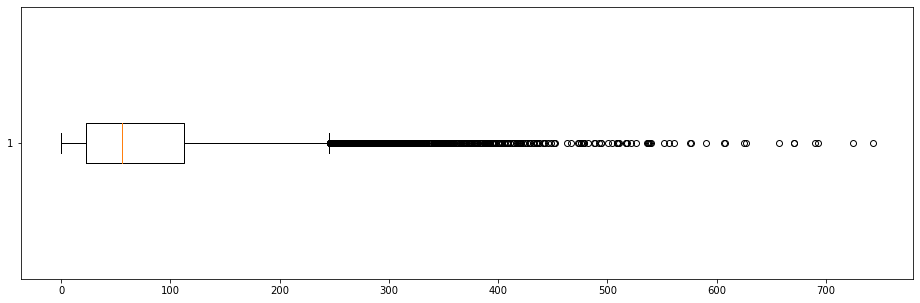

In [12]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize=(16,5))
plt.boxplot(df['sessions'], vert=False, showfliers=True)
plt.show()

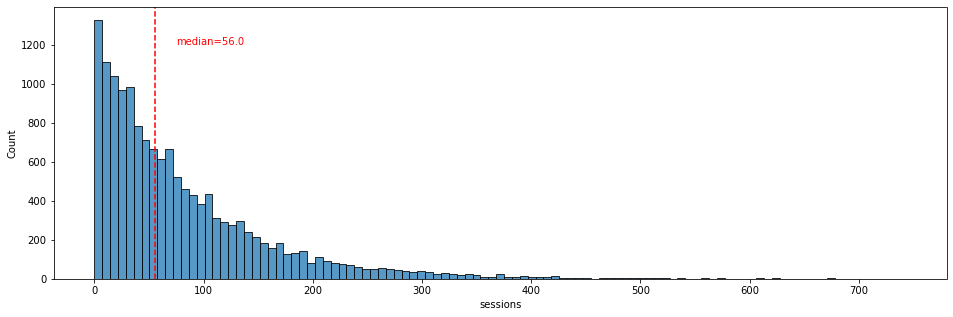

In [14]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(16,5))
sns.histplot(data=df, x="sessions")
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

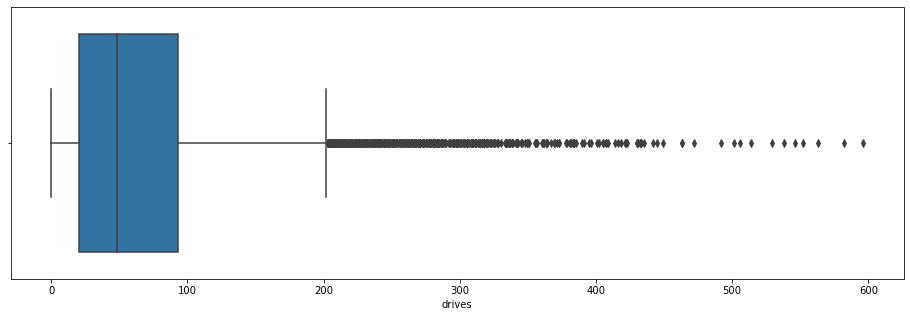

In [15]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize=(16,5))
sns.boxplot(x=df['drives'])
plt.show()

48.0


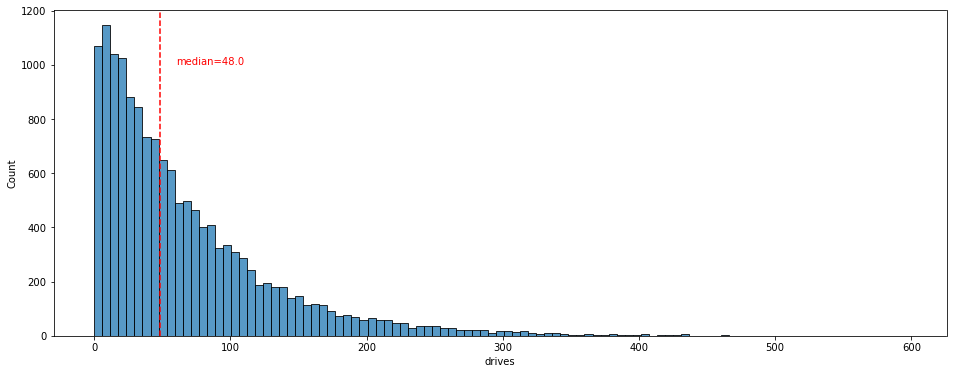

In [24]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='drives')
median = df['drives'].median()
print(median)
plt.axvline(median, color='red', linestyle='--')
plt.text(60,1000, 'median=48.0', color='red')
plt.show()

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

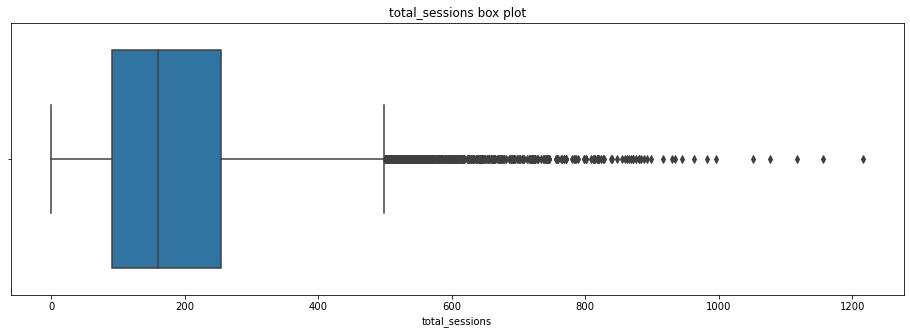

In [30]:
# Box plot
### YOUR CODE HERE ###

plt.figure(figsize=(16,5))
plt.title('total_sessions box plot')
sns.boxplot(x=df['total_sessions'])
plt.show()

159.5681147


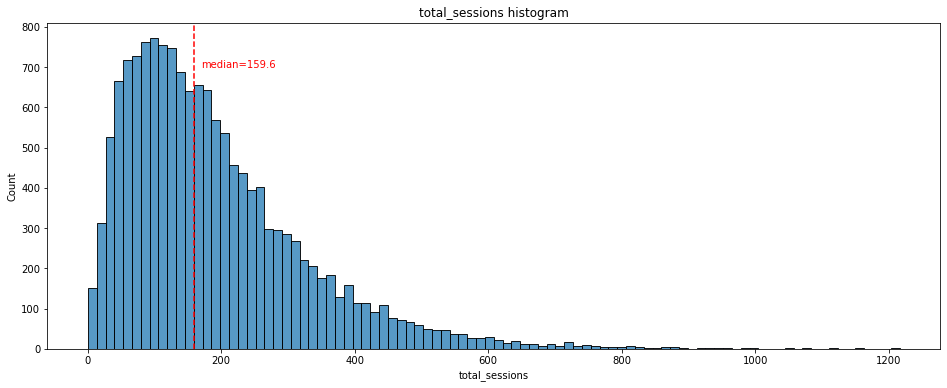

In [29]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='total_sessions')
plt.title('total_sessions histogram')
median = df['total_sessions'].median()
print(median)
plt.axvline(median, color='red', linestyle='--')
plt.text(170,700, 'median=159.6', color='red')
plt.show()

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

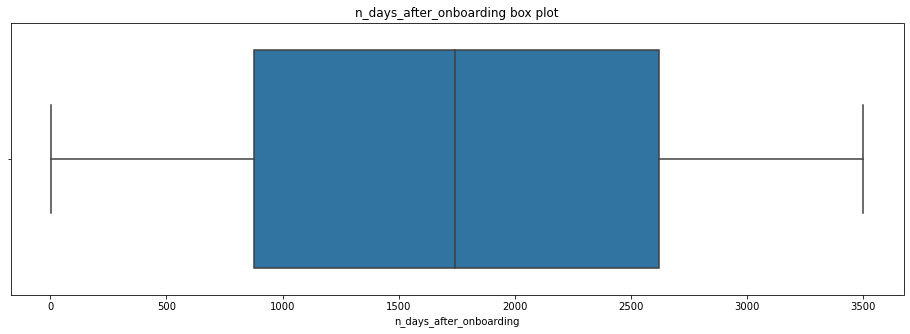

In [32]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize=(16,5))
plt.title('n_days_after_onboarding box plot')
sns.boxplot(x=df['n_days_after_onboarding'],showfliers=True)
plt.show()

1741.0


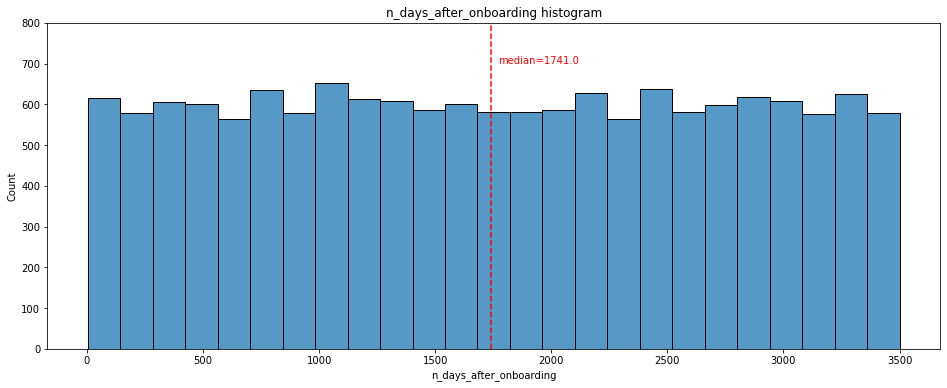

In [37]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='n_days_after_onboarding')
plt.title('n_days_after_onboarding histogram')
median = df['n_days_after_onboarding'].median()
print(median)
plt.axvline(median, color='red', linestyle='--')
plt.text(1770,700, 'median=1741.0', color='red')
plt.yticks(range(0,900,100))
plt.show()

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

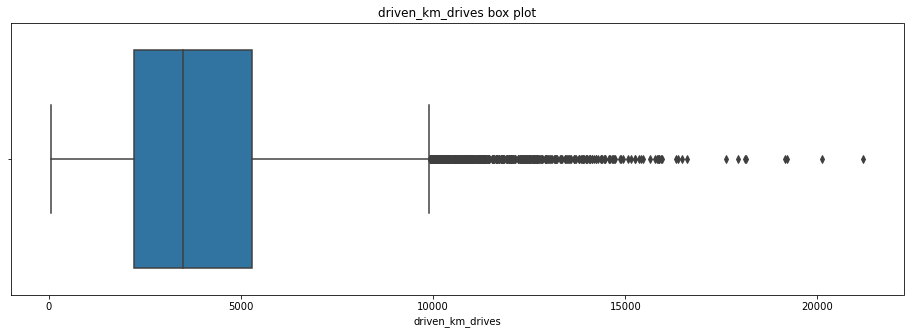

In [38]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize=(16,5))
plt.title('driven_km_drives box plot')
sns.boxplot(x=df['driven_km_drives'],showfliers=True)
plt.show()

3493.858085


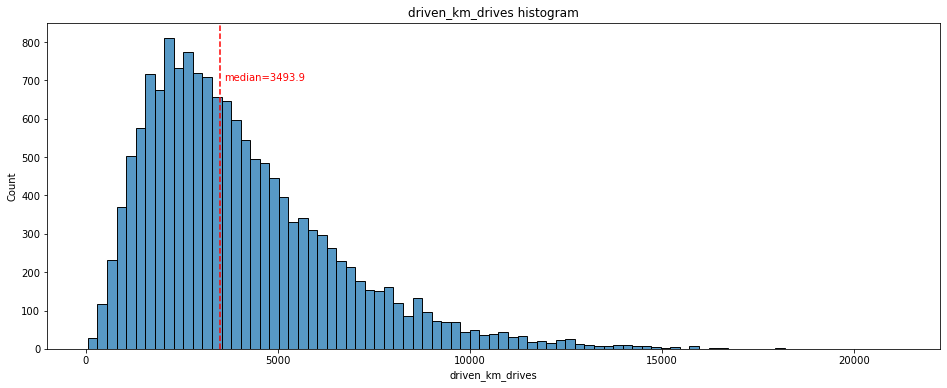

In [40]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='driven_km_drives')
plt.title('driven_km_drives histogram')
median = df['driven_km_drives'].median()
print(median)
plt.axvline(median, color='red', linestyle='--')
plt.text(3600,700, 'median=3493.9', color='red')
plt.yticks(range(0,900,100))
plt.show()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

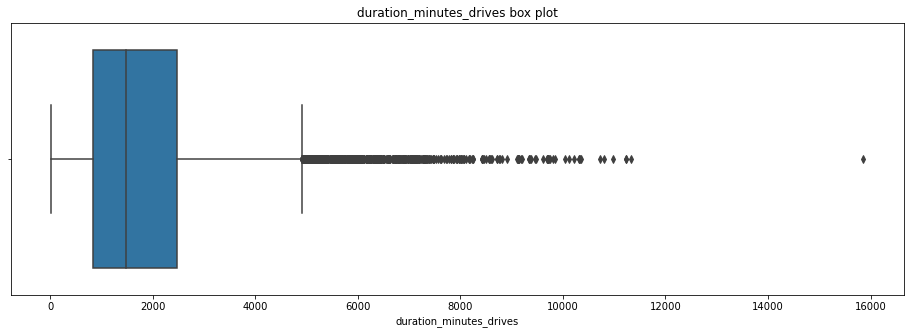

In [41]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize=(16,5))
plt.title('duration_minutes_drives box plot')
sns.boxplot(x=df['duration_minutes_drives'],showfliers=True)
plt.show()

1478.249859


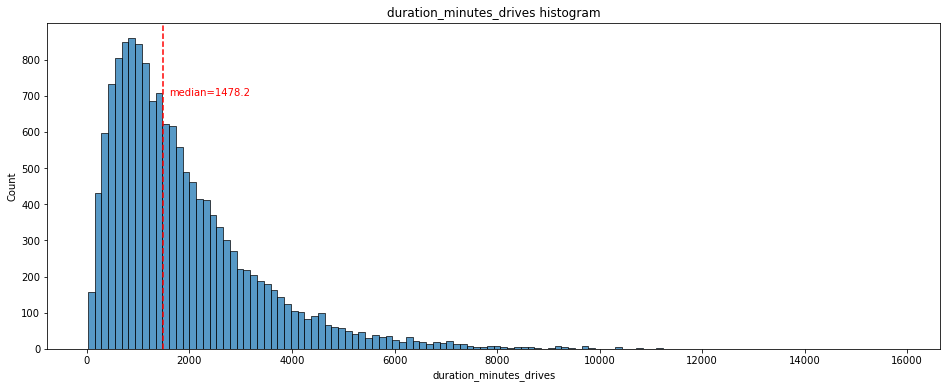

In [44]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='duration_minutes_drives')
plt.title('duration_minutes_drives histogram')
median = df['duration_minutes_drives'].median()
print(median)
plt.axvline(median, color='red', linestyle='--')
plt.text(1600,700, 'median=1478.2', color='red')
plt.yticks(range(0,900,100))
plt.show()

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

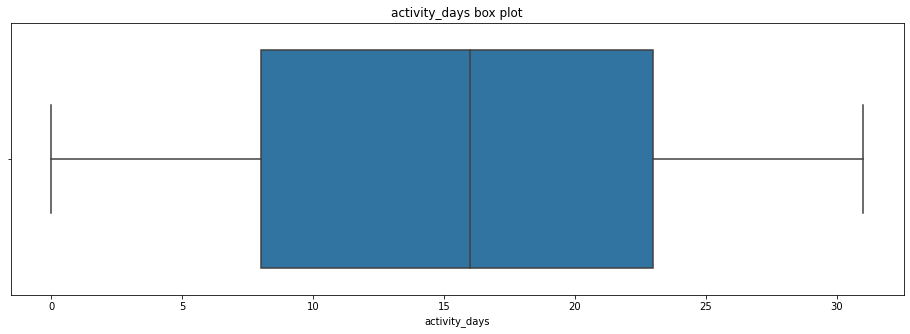

In [45]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize=(16,5))
plt.title('activity_days box plot')
sns.boxplot(x=df['activity_days'],showfliers=True)
plt.show()

16.0


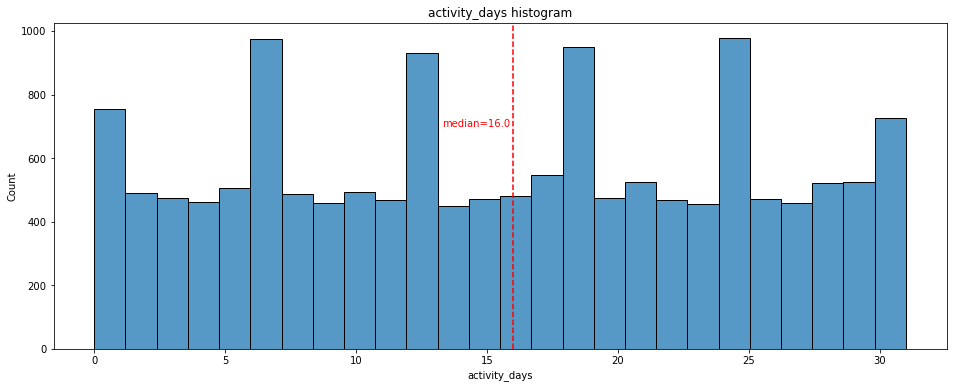

In [52]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='activity_days')
plt.title('activity_days histogram')
median = df['activity_days'].median()
print(median)
plt.axvline(median, color='red', linestyle='--')
plt.text(13.3,700, 'median=16.0', color='red')
#plt.yticks(range(0,900,100))
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

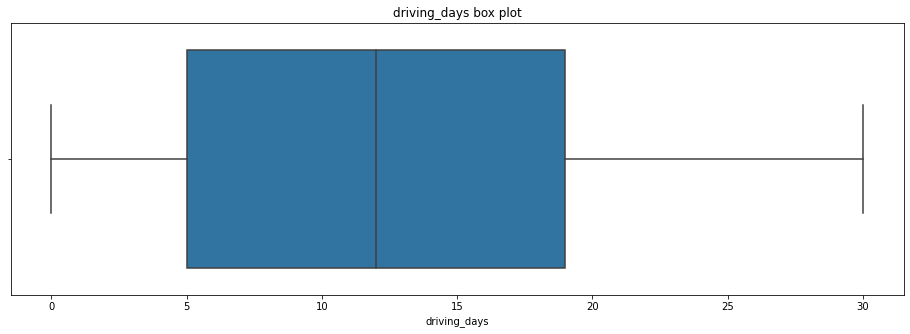

In [54]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize=(16,5))
plt.title('driving_days box plot')
sns.boxplot(x=df['driving_days'],showfliers=True)
plt.show()

12.0


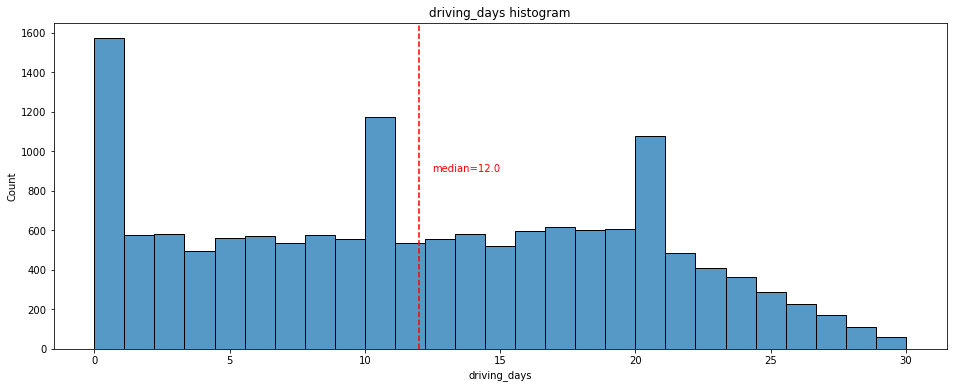

In [56]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='driving_days')
plt.title('driving_days histogram')
median = df['driving_days'].median()
print(median)
plt.axvline(median, color='red', linestyle='--')
plt.text(12.5,900, 'median=12.0', color='red')
#plt.yticks(range(0,900,100))
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

iPhone     9672
Android    5327
Name: device, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

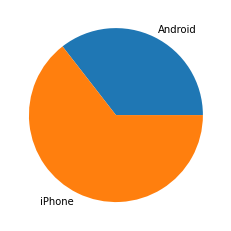

In [5]:
# Pie chart
### YOUR CODE HERE ###
#plt.figure(figsize=(7,7))
label = 'Android','iPhone'

size_check = (df['device']).value_counts()
print(size_check)
sizes = [5327,9672]

plt.pie(sizes, labels=label)
plt.show()

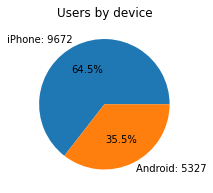

In [4]:
# another way of doing it

plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

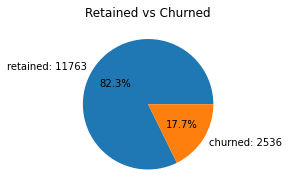

In [6]:
# Pie chart
### YOUR CODE HERE ###
plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Retained vs Churned');

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

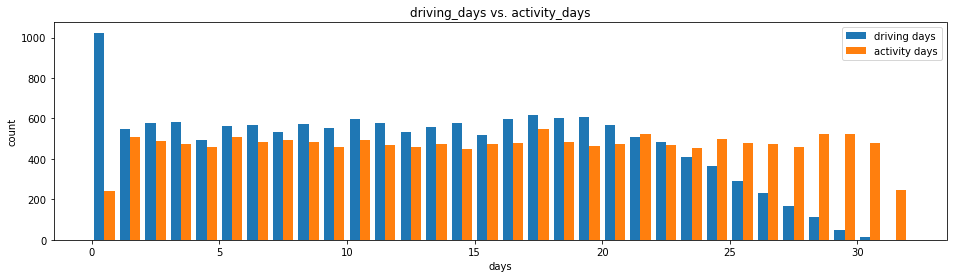

In [8]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(16,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [13]:
### YOUR CODE HERE
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

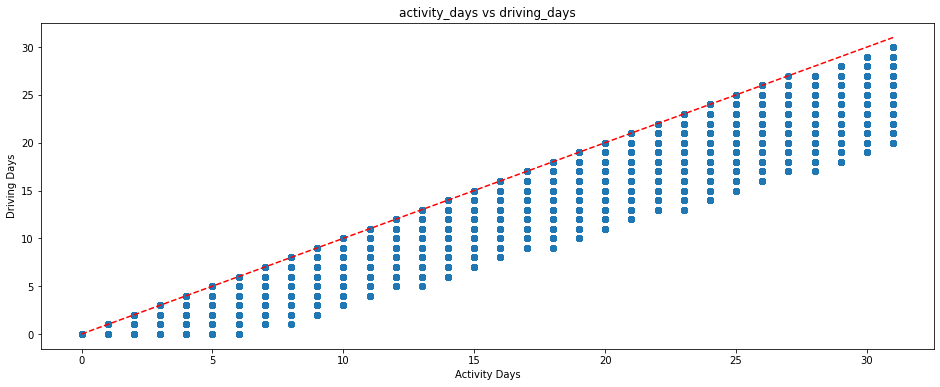

In [17]:
# Scatter plot
### YOUR CODE HERE ###
plt.figure(figsize=(16,6))
plt.scatter(x=df['activity_days'], y=df['driving_days'])
plt.title('activity_days vs driving_days')
plt.xlabel('Activity Days')
plt.ylabel('Driving Days')
plt.plot([0,31], [0,31], color='red', linestyle='--');
plt.show()

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

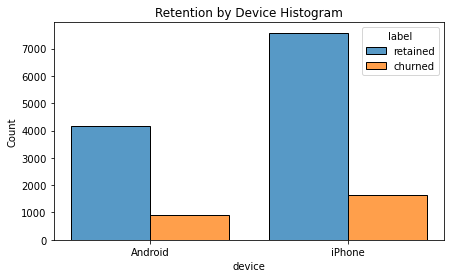

In [25]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(7,4))
sns.histplot(data=df, x="device", hue="label", multiple="dodge", shrink=.8)
plt.title('Retention by Device Histogram')

plt.show()

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [27]:
# 1. Create `km_per_driving_day` column
### YOUR CODE HERE ###
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']
# 2. Call `describe()` on the new column
### YOUR CODE HERE ###
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [28]:
# 1. Convert infinite values to zero
### YOUR CODE HERE ###
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
# 2. Confirm that it worked
### YOUR CODE HERE ###
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

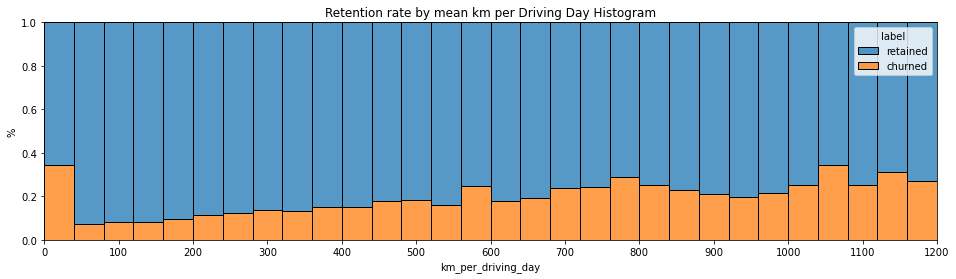

In [46]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(16,4))
sns.histplot(data=df, x="km_per_driving_day", bins=range(0,1201,40),hue="label", multiple="fill")
plt.title('Retention rate by mean km per Driving Day Histogram')
#plt.xlim(0,1200)
plt.ylabel('%')
plt.xticks(range(0,1300,100))
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

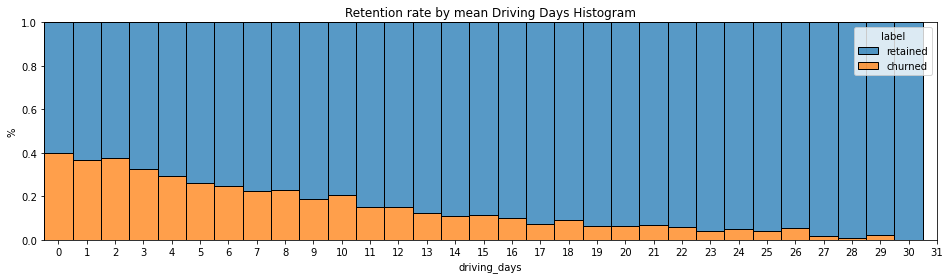

In [54]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(16,4))
sns.histplot(data=df, x="driving_days", bins=range(0,32,1),hue="label", multiple="fill",discrete=True)
plt.title('Retention rate by mean Driving Days Histogram')

plt.ylabel('%')
plt.xticks(range(0,32,1))
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [55]:
### YOUR CODE HERE ###
df['percent_sessions_in_last_month'] = df['sessions']/df['total_sessions']
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266


What is the median value of the new column?

In [56]:
### YOUR CODE HERE ###
df['percent_sessions_in_last_month'].mean()

0.44925533781715576

Now, create a histogram depicting the distribution of values in this new column.

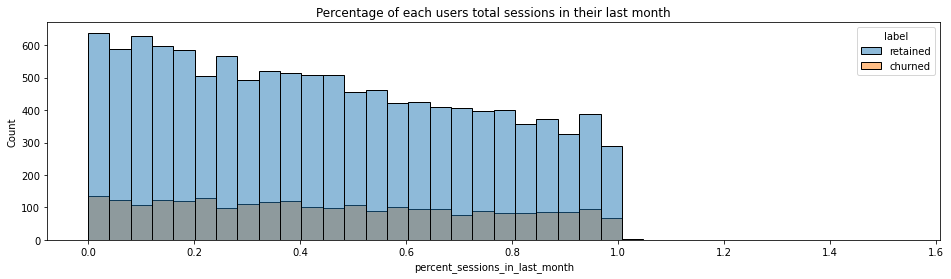

In [62]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize=(16,4))
sns.histplot(data=df, x="percent_sessions_in_last_month",hue="label", multiple="layer")
plt.title('Percentage of each users total sessions in their last month')

plt.show()

Check the median value of the `n_days_after_onboarding` variable.

In [63]:
### YOUR CODE HERE ###
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

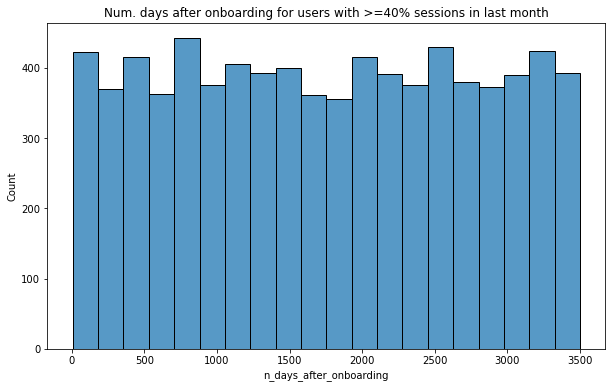

<Figure size 1152x288 with 0 Axes>

In [64]:
# Histogram
### YOUR CODE HERE ###

data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(10,6))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');plt.figure(figsize=(16,4))

plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [3]:
### YOUR CODE HERE ###
def outlier_imputer_percentile(column_name, percentile):
    threshold = df[column_name].quantile(percentile)
    
    df.loc[df[column_name]>threshold, column_name] = threshold
    
    print('Column {} , Percentile: {}, Threshold: {}'.format(column_name, percentile,threshold))

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [6]:
### YOUR CODE HERE ###
column_names = ['sessions','drives','total_sessions','driven_km_drives','duration_minutes_drives']
for name in column_names:
    outlier_imputer_percentile(name, 0.95)

Column sessions , Percentile: 0.95, Threshold: 243.0
Column drives , Percentile: 0.95, Threshold: 201.0
Column total_sessions , Percentile: 0.95, Threshold: 454.3632037399997
Column driven_km_drives , Percentile: 0.95, Threshold: 8889.7942356
Column duration_minutes_drives , Percentile: 0.95, Threshold: 4668.899348999999


Call `describe()` to see if your change worked.

In [7]:
### YOUR CODE HERE ###
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

### **Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

In [8]:
### YOUR CODE HERE ###
df['drives_per_session'] = df['drives']/df['sessions']

In [9]:
### YOUR CODE HERE ###
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,drives_per_session
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,0.809524


In [13]:
df.corr()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,drives_per_session
ID,1.000000,0.010622,0.009740,0.002722,-0.005673,-0.000606,-0.000771,-0.000773,0.000236,-0.001887,-0.001808,-0.010327
sessions,0.010622,1.000000,0.996907,0.595796,0.006480,0.004204,0.004687,0.001425,-0.005364,0.024374,0.018518,-0.355494
drives,0.009740,0.996907,1.000000,0.593945,0.006198,0.003463,0.005973,0.001789,-0.004763,0.023821,0.018036,-0.306895
total_sessions,0.002722,0.595796,0.593945,1.000000,0.005328,0.003469,0.005285,-0.000835,-0.001456,0.015932,0.012568,-0.204791
n_days_after_onboarding,-0.005673,0.006480,0.006198,0.005328,1.000000,0.000435,-0.008075,-0.002852,-0.009140,-0.009725,-0.008563,0.001144
total_navigations_fav1,-0.000606,0.004204,0.003463,0.003469,0.000435,1.000000,0.002306,-0.007720,0.003550,0.011066,0.010359,-0.021379
total_navigations_fav2,-0.000771,0.004687,0.005973,0.005285,-0.008075,0.002306,1.000000,0.003714,-0.002820,-0.004036,0.001951,0.008839
driven_km_drives,-0.000773,0.001425,0.001789,-0.000835,-0.002852,-0.007720,0.003714,1.000000,0.690996,-0.005620,-0.007816,0.001377
duration_minutes_drives,0.000236,-0.005364,-0.004763,-0.001456,-0.009140,0.003550,-0.002820,0.690996,1.000000,-0.005852,-0.007585,0.018940
activity_days,-0.001887,0.024374,0.023821,0.015932,-0.009725,0.011066,-0.004036,-0.005620,-0.005852,1.000000,0.947706,-0.017114


### **Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?

> *Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.*

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

> *Most of the data was not problematic. However, several variables had highly improbable or perhaps even impossible outlying values, such as `driven_km_drives`. Some of the monthly variables also might be problematic, such as `activity_days` and `driving_days`, because one has a max value of 31 while the other has a max value of 30.

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

> *Yes. I'd want to ask the Waze data team why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?

4. What percentage of users churned and what percentage were retained?

> *Less than 18% of users churned, and \~82% were retained.*

5. What factors correlated with user churn? How?

> *Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.*

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?

> *No. Users of all tenures from brand new to \~10 years were relatively evenly represented in the data. This is borne out by the histogram for `n_days_after_onboarding`, which reveals a uniform distribution for this variable.*

# **Waze Project**
**Course 4 - The Power of Statistics**

Your team is nearing the midpoint of their user churn project. So far, you’ve completed a project proposal, and used Python to explore and analyze Waze’s user data. You’ve also used Python to create data visualizations. The next step is to use statistical methods to analyze and interpret your data.

You receive a new email from Sylvester Esperanza, your project manager. Sylvester tells your team about a new request from leadership: to analyze the relationship between mean amount of rides and device type. You also discover follow-up emails from three other team members: May Santner, Chidi Ga, and Harriet Hadzic. These emails discuss the details of the analysis. They would like a statistical analysis of ride data based on device type. In particular, leadership wants to know if there is a statistically significant difference in mean amount of rides between iPhone® users and Android™ users. A final email from Chidi includes your specific assignment: to conduct a two-sample hypothesis test (t-test) to analyze the difference in the mean amount of rides between iPhone users and Android users.

# **Data exploration and hypothesis testing**

*Complete the following tasks to perform statistical analysis of your data:*

### **Imports**




Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [1]:
# Import any relevant packages or libraries
from scipy import stats

### **Data exploration**

**Note:** In the dataset, `device` is a categorical variable with the labels `iPhone` and `Android`.

In order to perform this analysis, you must turn each label into an integer.  The following code assigns a `1` for an `iPhone` user and a `2` for `Android`.  It assigns this label back to the variable `device_new`.

**Note:** Creating a new variable is ideal so that you don't overwrite original data.



1. Create a dictionary called `map_dictionary` that contains the class labels (`'Android'` and `'iPhone'`) for keys and the values you want to convert them to (`2` and `1`) as values.

2. Create a new column called `device_type` that is a copy of the `device` column.

3. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `device_type` series. Pass `map_dictionary` as its argument. Reassign the result back to the `device_type` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.


In [3]:
# 1. Create `map_dictionary`
### YOUR CODE HERE ###
map_dictionary = {'Android':2,'iPhone':1}
# 2. Create new `device_type` column
### YOUR CODE HERE ###
df['device_type'] = df['device'].copy()
# 3. Map the new column to the dictionary
### YOUR CODE HERE ###
df['device_type'] = df['device_type'].map(map_dictionary)

In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device_type
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,2
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,2
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,1
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,2


You are interested in the relationship between device type and the number of drives. One approach is to look at the average number of drives for each device type. Calculate these averages.

In [15]:
### YOUR CODE HERE ###
device_drives = pd.DataFrame(df.groupby(['device_type'])['drives'].mean())
device_drives

,drives
device_type,
1,67.859078
2,66.231838


Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, you can conduct a hypothesis test.


### **Hypothesis testing**

Your goal is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).

Recall the difference between the null hypothesis ($H_0$) and the alternative hypothesis ($H_A$).

**Question:** What are your hypotheses for this data project?

1. H0 : The mean amount of drives is not different between iPhone® users and Android™ users. 
2. HA : The mean amount of drives is different the same between iPhone® users and Android™ users. 

Next, choose 5% as the significance level and proceed with a two-sample t-test.

You can use the `stats.ttest_ind()` function to perform the test.


**Technical note**: The default for the argument `equal_var` in `stats.ttest_ind()` is `True`, which assumes population variances are equal. This equal variance assumption might not hold in practice (that is, there is no strong reason to assume that the two groups have the same variance); you can relax this assumption by setting `equal_var` to `False`, and `stats.ttest_ind()` will perform the unequal variances $t$-test (known as Welch's `t`-test). Refer to the [scipy t-test documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.


1. Isolate the `drives` column for iPhone users.
2. Isolate the `drives` column for Android users.
3. Perform the t-test

In [19]:
# 1. Isolate the `drives` column for iPhone users.
### YOUR CODE HERE ###
drives_iphone = df[df['device_type']==1]['drives']
# 2. Isolate the `drives` column for Android users.
### YOUR CODE HERE ###
drives_android = df[df['device_type']==2]['drives']

# 3. Perform the t-test
### YOUR CODE HERE ###
stats.ttest_ind(a=drives_iphone, b=drives_android, equal_var=False)

Ttest_indResult(statistic=1.4635232068852353, pvalue=0.1433519726802059)

**Question:** Based on the p-value you got above, do you reject or fail to reject the null hypothesis?

==> The p-value is 0.143 > 0.05, so we fail to reject the null hypothesis. This means that the difference in average drives for iPhone and Android users occured by chance, and doesn't have statistical significance.

### **Communicate insights with stakeholders**

Now that you've completed your hypothesis test, the next step is to share your findings with the Waze leadership team. Consider the following question as you prepare to write your executive summary:

* What business insight(s) can you draw from the result of your hypothesis test?

==> There is a sligh difference in the average drives between iPhone and Android users.
The difference in the average drives by device has no statistical significance, since the p-value > 5% (reason why we failed to reject the null hypothesis).
One potential next step is to explore what other factors influence the variation in the number of drives, and run additonal hypothesis tests to learn more about user behavior.


# **Waze Project**
**Course 5 - Regression analysis: Simplify complex data relationships**

Your team is more than halfway through their user churn project. Earlier, you completed a project proposal, used Python to explore and analyze Waze’s user data, created data visualizations, and conducted a hypothesis test. Now, leadership wants your team to build a regression model to predict user churn based on a variety of variables.

# **Course 5 End-of-course project: Regression modeling**

Your team is more than halfway through their user churn project. Earlier, you completed a project proposal, used Python to explore and analyze Waze’s user data, created data visualizations, and conducted a hypothesis test. Now, leadership wants your team to build a regression model to predict user churn based on a variety of variables.

In this activity, you will build a binomial logistic regression model. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.
<br/>

**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.
<br/>

# **Build a regression model**

### **Imports**
Import the data and packages that you've learned are needed for building logistic regression models.

In [1]:
# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics #for the Confusion Matrix

### **Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.



Start with `.shape` and `info()`.

Use `.drop()` to remove the ID column since we don't need this information for your analysis.

In [6]:
df = df.drop('ID', axis=1)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Now, check the class balance of the dependent (target) variable, `label`.

In [8]:
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

**Question:** Are there any variables that could potentially have outliers just by assessing at the quartile values, standard deviation, and max values?

The variables that can potentially have outliers are:
1. total_sessions : max=1216.2 and mean=189.9, Q3 = 254.2, std = 135.4
2. total_navigations_fav1
3. total_navigations_fav2
4. driven_km_drives : max=21183.4 and mean=4039.3, Q3 = 5289.9, std = 2502.1
5. duration_minutes_drives : max=15851.7 and mean=1860.9, Q3 = 2464.4, std = 1446.7
6. sessions 
7. drives 


### **Create features**

Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

#### **`km_per_driving_day`**

You know from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [10]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [11]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day']=0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

In [12]:
# Create `professional_driver` column
mask_professional_driver = (df['drives']>= 60) & (df['driving_days']>= 15)
df['professional_driver'] = np.where(mask_professional_driver, 1, 0)

Perform a quick inspection of the new variable.

1. Check the count of professional drivers and non-professionals

2. Within each class (professional and non-professional) calculate the churn rate

In [13]:
# 1. Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# 2. Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

0    12405
1     2594
Name: professional_driver, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: label, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

### **Preparing variables**

Call `info()` on the dataframe to check the data type of the `label` variable and to verify if there are any missing values.

In [14]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int64  
dtypes: float64(4), int64(8

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [15]:
# Drop rows with missing data in `label` column
df=df.dropna(subset=['label'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14299 non-null  int64  
 2   drives                   14299 non-null  int64  
 3   total_sessions           14299 non-null  float64
 4   n_days_after_onboarding  14299 non-null  int64  
 5   total_navigations_fav1   14299 non-null  int64  
 6   total_navigations_fav2   14299 non-null  int64  
 7   driven_km_drives         14299 non-null  float64
 8   duration_minutes_drives  14299 non-null  float64
 9   activity_days            14299 non-null  int64  
 10  driving_days             14299 non-null  int64  
 11  device                   14299 non-null  object 
 12  km_per_driving_day       14299 non-null  float64
 13  professional_driver      14299 non-null  int64  
dtypes: float64(4), int64(8

#### **Impute outliers**

You rarely want to drop outliers, and generally will not do so unless there is a clear reason for it (e.g., typographic errors).

At times outliers can be changed to the **median, mean, 95th percentile, etc.**

Previously, you determined that seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.


In [16]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column]>threshold, column] = threshold

Call `describe()`.

In [17]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


#### **Encode categorical variables**

Change the data type of the `label` column to be binary. This change is needed to train a logistic regression model.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` as to not overwrite the original `label` variable.

In [18]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='retained', 0, 1)
df[['label','label2']]

,label,label2
0,retained,0
1,retained,0
2,retained,0
3,retained,0
4,retained,0
...,...,...
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1


### **Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

**Note:** In practice, modeling assumptions are often violated, and depending on the specifics of your use case and the severity of the violation, it might not affect your model much at all or it will result in a failed model.

#### **Collinearity**

Check the correlation among predictor variables. First, generate a correlation matrix.

In [19]:
# Generate a correlation matrix
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


Now, plot a correlation heatmap.

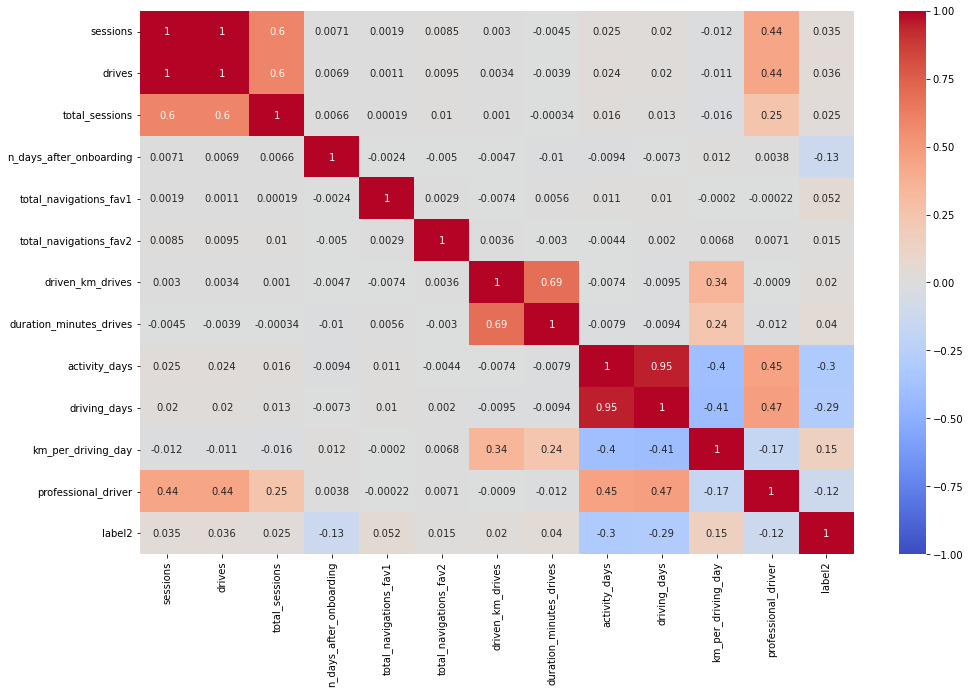

In [20]:
# Plot correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix,vmin=-1,vmax=1,annot=True,cmap='coolwarm')

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

**Question:** Which variables are multicollinear with each other?

The variables that are multicollinear with each other are:
1. sessions and drives (1)
2. driving_days and activity_days (0.95)

The other on that is close to 0.7 is: duration_minutes_drives and drive_km_drives(0.69)

### **Create dummies**

If you have selected `device` as an X variable, you will need to create dummy variables since this variable is categorical.

In cases with many categorical variables, you can use pandas built-in [`pd.get_dummies()`], or you can use scikit-learn's [`OneHotEncoder()`] function.

**Note:** Variables with many categories should only be dummied if absolutely necessary. Each category will result in a coefficient for your model which can lead to overfitting.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [21]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='iPhone',1,0)
df[['device2','device']]

,device2,device
0,0,Android
1,1,iPhone
2,0,Android
3,1,iPhone
4,0,Android
...,...,...
14994,1,iPhone
14995,0,Android
14996,1,iPhone
14997,1,iPhone


### **Model building**

#### **Assign predictor variables and target**

To build your model you need to determine what X variables you want to include in your model to predict your target&mdash;`label2`.

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [22]:
# Isolate predictor variables
X = df.drop(columns = ['label','label2','device','sessions','driving_days'])

In [42]:
X.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
0,200,296.748273,2276,208,0,2628.845068,1985.775061,28,138.360267,1,0
1,107,326.896596,1225,19,64,8898.716275,3160.472914,13,1246.901868,0,1
2,95,135.522926,2651,0,0,3059.148818,1610.735904,14,382.393602,0,0
3,40,67.589221,15,322,7,913.591123,587.196542,7,304.530374,0,1
4,68,168.247020,1562,166,5,3950.202008,1219.555924,27,219.455667,1,0


Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [23]:
# Isolate target variable
y = df['label2']

#### **Split the data**

Use scikit-learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to perform a train/test split on your data using the X and y variables you assigned above.

**Note 1:** It is important to do a train test to obtain accurate predictions.  You always want to fit your model on your training set and evaluate your model on your test set to avoid data leakage.

**Note 2:** Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [24]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

Use scikit-learn to instantiate a logistic regression model. Add the argument `penalty = None`.

It is important to add `penalty = None` since your predictors are unscaled.

Refer to scikit-learn's [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) documentation for more information.

Fit the model on `X_train` and `y_train`.

In [26]:
model = LogisticRegression(penalty='none', max_iter=400)

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Call the `.coef_` attribute on the model to get the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

If you want, create a series whose index is the column names and whose values are the coefficients in `model.coef_`.

In [27]:
pd.Series(model.coef_[0],index=X.columns)

drives                     0.001913
total_sessions             0.000327
n_days_after_onboarding   -0.000406
total_navigations_fav1     0.001232
total_navigations_fav2     0.000931
driven_km_drives          -0.000015
duration_minutes_drives    0.000109
activity_days             -0.106032
km_per_driving_day         0.000018
professional_driver       -0.001529
device2                   -0.001041
dtype: float64

Call the model's `intercept_` attribute to get the intercept of the model.

In [28]:
model.intercept_

array([-0.00170675])

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [29]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93963483, 0.06036517],
       [0.61967304, 0.38032696],
       [0.76463181, 0.23536819],
       ...,
       [0.91909641, 0.08090359],
       [0.85092112, 0.14907888],
       [0.93516293, 0.06483707]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [30]:
### YOUR CODE HERE ###
logit_data = X_train.copy()
logit_data['logit'] = [np.log(prob[1]/prob[0])for prob in training_probabilities]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `driving_days`.

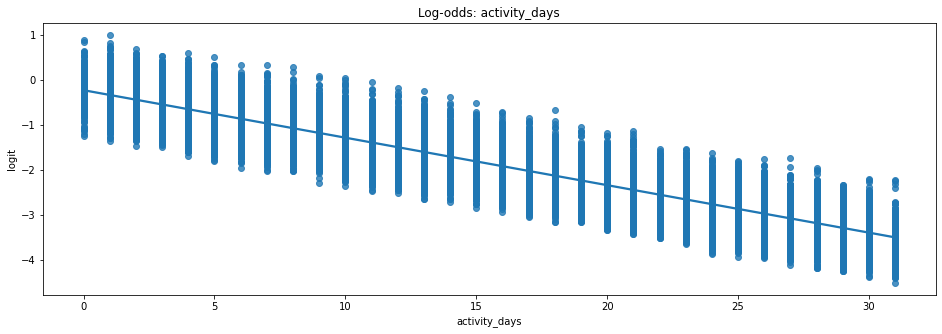

In [48]:
# Plot regplot of `activity_days` log-odds
plt.figure(figsize=(16,5))
sns.regplot(x='activity_days',y='logit',data=logit_data)
plt.title('Log-odds: activity_days')
plt.show()

### **Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.


In [49]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**.  What is the accuracy of your model?

*Consider:  Is accuracy the best metric to use to evaluate this model?*

In [50]:
# Score the model (accuracy) on the test data
model.score(X_test,y_test)

0.8237762237762237

### **Task 4b. Show results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [51]:
cm = metrics.confusion_matrix(y_test,y_preds, labels=model.classes_)

Next, use the `ConfusionMatrixDisplay()` function to display the confusion matrix from the above cell, passing the confusion matrix you just created as its argument.

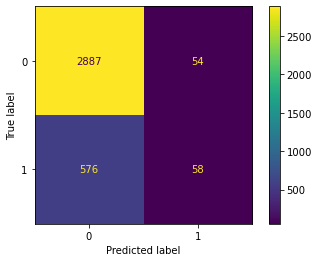

In [53]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(values_format='')

You can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a table from `y_test` and `y_preds`.

In [54]:
# Calculate precision manually
pc_manual = cm[1,1] / (cm[1,1]+cm[0,1])
pc_manual

0.5178571428571429

In [55]:
# Calculate recall manually
rc_manual = cm[1,1] / (cm[1,1]+cm[1,0])
rc_manual

0.0914826498422713

In [61]:
# Create a classification report
target_labels =['retained','churned']
report = metrics.classification_report(y_test,y_preds,target_names=target_labels)
print(report)

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



**Note:** The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [62]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', 0.001913369447769776),
 ('total_navigations_fav1', 0.001231754741616306),
 ('total_navigations_fav2', 0.0009314786513814626),
 ('total_sessions', 0.00032707088819142904),
 ('duration_minutes_drives', 0.00010909343558951453),
 ('km_per_driving_day', 1.8223094015325207e-05),
 ('driven_km_drives', -1.4860453424647997e-05),
 ('n_days_after_onboarding', -0.00040647763730561445),
 ('device2', -0.0010412175209008018),
 ('professional_driver', -0.0015285041567402024),
 ('activity_days', -0.10603196504385491)]

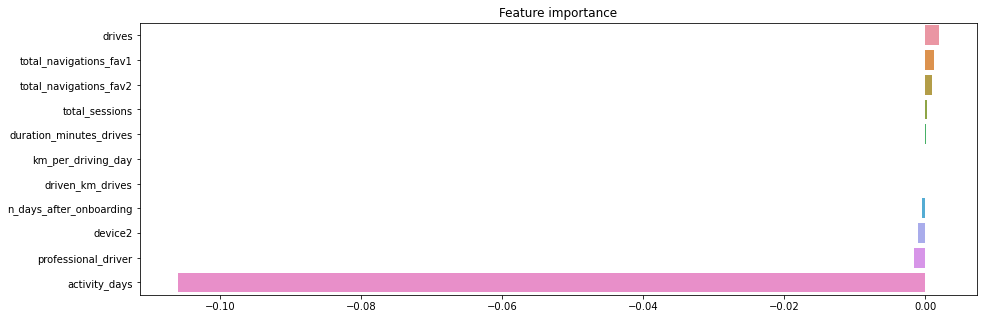

In [65]:
# Plot the feature importances
plt.figure(figsize=(15,5))
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

### **Task 4c. Conclusion**

Now that you've built your regression model, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What variable most influenced the model's prediction? How? Was this surprising?

2. Were there any variables that you expected to be stronger predictors than they were?

3. Why might a variable you thought to be important not be important in the model?

4. Would you recommend that Waze use this model? Why or why not?

5. What could you do to improve this model?

6. What additional features would you like to have to help improve the model?


1. The variable with most influence in the model's prediction was 'activity_days', with a negative correlation of -0.10 with user churn. This was not surprising because this variable was also highly correlated with the variable 'driving_days' and if we think about it, it makes sense that if the days that a user opens the app are fewer, we can expect the user to be most likely to churn.

2. Yes, I was expecting the variable 'km_per_driving_day' and 'duration_minutes_drives' to have more of an impact because with an increase in this values, I was expecting to observe less user churn.

3. The features interact with each other in logistic regression models, which can result in counterintuitive relationships. This can make it harder to explain the model, but is one of the reasons that makes it more predictive.

4. I wouldn't recommend because the model is not yet refined. The recall score is very poor(~9%), so the model is not a very good predictor. This model is only useful in guiding further exploratory analysis.

5. If we had someone with domain knowledge, we could engineer new features that could help us. In our present case, the feature 'professional_driver' that we created was the third-most predictive predictor. Another way of improving the model can be scaling the predictor variables in order to reduce noise from unpredictive features.

6. Maybe geographical location, and hour of the drives. Another feature could be the interaction with the app in reporting accidents, etc.

# **Course 6 End-of-Course Project: Build a machine learning model**

Your team is close to completing their user churn project. Previously, you completed a project proposal, and used Python to explore and analyze Waze’s user data, create data visualizations, and conduct a hypothesis test. Most recently, you built a binomial logistic regression model based on multiple variables.

Leadership appreciates all your hard work. Now, they want your team to build a machine learning model to predict user churn. To get the best results, your team decides to build and test two tree-based models: random forest and XGBoost.

Your work will help leadership make informed business decisions to prevent user churn, improve user retention, and grow Waze’s business.

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.
<br/>

**The purpose** of this model is to find factors that drive user churn.

**The goal** of this model is to predict whether or not a Waze user is retained or churned.
<br/>

# **Build a machine learning model**


In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a Waze user won't churn, but they actually will)?
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a Waze user will churn, but they actually won't)?

3.  Do the benefits of such a model outweigh the potential problems?
4.  Would you proceed with the request to build this model? Why or why not?



1. The aim is to build 2 tree-based machine learning models: random forest and XGBoost, in order to find factors that drive user churn and predict whether or not a Waze user will churn or is retained.

2. I don't there are ethical implications. If the model makes errors, it won't predict users who might churn and won't allow Waze to prevent them from doing so. Considering that Retained = 0 and Churned = 1, if we get a false negative, the user will churn and the company won't be able to prevent this, resulting in a lost customer. If we get a false positive

3. If the model is good at predicting the outcome, yes. If the model doesn't have enough quality, it's better not to use it.

4. Yes, to check if a good predicting model can be created. We can't know until we try and in this case, constructing the model doesn't have negative implications. 


### **Imports**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score,\
precision_score,recall_score, RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve, auc

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

Now read in the dataset as `df0` and inspect the first five rows. This time we import it with other name.

In [2]:
# Import dataset
df0 = pd.read_csv('waze_dataset.csv')

In [3]:
# Inspect the first five rows
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


### **Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. You know that some features had stronger correlations with churn than others, and you also created some features that may be useful.

In this part of the project, you'll engineer these features and some new features to use for modeling.

To begin, create a copy of `df0` to preserve the original dataframe. Call the copy `df`.

In [4]:
# Copy the df0 dataframe
df = df0.copy()

#### **`km_per_driving_day`**

1. Create a feature representing the mean number of kilometers driven on each driving day in the last month for each user. Add this feature as a column to `df`.

2. Get descriptive statistics for this new feature



In [6]:
# 1. Create `km_per_driving_day` feature
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Get descriptive stats
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Notice that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [7]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`percent_sessions_in_last_month`**

1. Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

2. Get descriptive statistics for this new feature

In [8]:
# 1. Create `percent_sessions_in_last_month` feature
df['percent_sessions_in_last_month'] = (df['sessions']/df['total_sessions'])
# 1. Get descriptive stats
df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

In [9]:
# Create `professional_driver` feature
mask_professional_driver = (df['drives'] >= 60) & (df['driving_days'] >= 15)
df['professional_driver'] = np.where(mask_professional_driver, 1, 0)

#### **`total_sessions_per_day`**

Now, create a new column that represents the mean number of sessions per day _since onboarding_.

In [10]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions']/ df['n_days_after_onboarding']

As with other features, get descriptive statistics for this new feature.

In [11]:
# Get descriptive stats
df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

#### **`km_per_hour`**

Create a column representing the mean kilometers per hour driven in the last month.

In [12]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60 )
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

#### **`km_per_drive`**

Create a column representing the mean number of kilometers per drive made in the last month for each user. Then, print descriptive statistics for the feature.

In [13]:
# Create `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

This feature has infinite values too. Convert the infinite values to zero, then confirm that it worked.

In [14]:
# 1. Convert infinite values to zero
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0

# 2. Confirm that it worked
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

#### **`percent_of_sessions_to_favorite`**

Finally, create a new column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places. Then, print descriptive statistics for the new column.

This is a proxy representation for the percent of overall drives that are to a favorite place. Since total drives since onboarding are not contained in this dataset, total sessions must serve as a reasonable approximation.

People whose drives to non-favorite places make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.

In [15]:
# Create `percent_of_sessions_to_favorite` feature
df['percent_of_sessions_to_favorite']=(df['total_navigations_fav1']+df['total_navigations_fav2'])/df['total_sessions']

# Get descriptive stats
df['percent_of_sessions_to_favorite'].describe()

count    14999.000000
mean         1.665439
std          8.865666
min          0.000000
25%          0.203471
50%          0.649818
75%          1.638526
max        777.563629
Name: percent_of_sessions_to_favorite, dtype: float64

### **Drop missing values**

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [16]:
# Drop rows with missing values
df = df.dropna(subset=['label'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               14299 non-null  int64  
 1   label                            14299 non-null  object 
 2   sessions                         14299 non-null  int64  
 3   drives                           14299 non-null  int64  
 4   total_sessions                   14299 non-null  float64
 5   n_days_after_onboarding          14299 non-null  int64  
 6   total_navigations_fav1           14299 non-null  int64  
 7   total_navigations_fav2           14299 non-null  int64  
 8   driven_km_drives                 14299 non-null  float64
 9   duration_minutes_drives          14299 non-null  float64
 10  activity_days                    14299 non-null  int64  
 11  driving_days                     14299 non-null  int64  
 12  device                 

### **Outliers**

You know from previous EDA that many of these columns have outliers. However, tree-based models are resilient to outliers, so there is no need to make any imputations.

### **Variable encoding**

#### **Dummying features**

In order to use `device` as an X variable, you will need to convert it to binary, since this variable is categorical.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [17]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='iPhone',1,0)
df[['device','device2']].head()

,device,device2
0,Android,0
1,iPhone,1
2,Android,0
3,iPhone,1
4,Android,0


#### **Target encoding**

The target variable is also categorical, since a user is labeled as either "churned" or "retained." Change the data type of the `label` column to be binary. This change is needed to train the models.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` so as not to overwrite the original `label` variable.

In [18]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned',1,0)
df[['label','label2']].head(10)

,label,label2
0,retained,0
1,retained,0
2,retained,0
3,retained,0
4,retained,0
5,retained,0
6,retained,0
7,retained,0
8,retained,0
9,churned,1


### **Feature selection**

Tree-based models can handle multicollinearity, so the only feature that can be cut is `ID`, since it doesn't contain any information relevant to churn.

Note, however, that `device` won't be used simply because it's a copy of `device2`.

Drop `ID` from the `df` dataframe.

In [19]:
# Drop `ID` column
df = df.drop('ID', axis=1)

In [20]:
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_sessions_to_favorite,device2,label2
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,1,0.130381,79.430298,11.632058,0.700931,0,0
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856,0,0.266854,260.389902,128.186173,0.253903,1,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0,0.051121,113.953460,32.201567,0.000000,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0,4.505948,93.351141,22.839778,4.867640,1,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,1,0.107713,194.342970,58.091206,1.016363,0,0


### **Evaluation metric**

Before modeling, you must decide on an evaluation metric. This will depend on the class balance of the target variable and the use case of the model.

First, examine the class balance of your target variable.

In [21]:
# Get class balance of 'label' col
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

Approximately 18% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

Now, consider which evaluation metric is best. Remember, accuracy might not be the best gauge of performance because a model can have high accuracy on an imbalanced dataset and still fail to predict the minority class.

It was already determined that the risks involved in making a false positive prediction are minimal. No one stands to get hurt, lose money, or suffer any other significant consequence if they are predicted to churn. Therefore, select the model based on the recall score.

### **Modeling workflow and model selection process**

The final modeling dataset contains 14,299 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

1. Split the data into train/validation/test sets (60/20/20)

Note that, when deciding the split ratio and whether or not to use a validation set to select a champion model, consider both how many samples will be in each data partition, and how many examples of the minority class each would therefore contain. In this case, a 60/20/20 split would result in \~2,860 samples in the validation set and the same number in the test set, of which \~18%&mdash;or 515 samples&mdash;would represent users who churn.
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/validation/test sets.

1. Define a variable `X` that isolates the features. Remember not to use `device`.

2. Define a variable `y` that isolates the target variable (`label2`).

3. Split the data 80/20 into an interim training set and a test set. Don't forget to stratify the splits, and set the random state to 42.

4. Split the interim training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets. Again, don't forget to stratify the splits and set the random state.

In [22]:
# 1. Isolate X variables
X = df.drop(['label','label2','device'],axis=1)

# 2. Isolate y variable
y = df['label2']

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Split into train and validate sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

Verify the number of samples in the partitioned data.

In [24]:
for i in [X_tr, X_test, X_val]:
    print(len(i))

8579
2860
2860


This aligns with expectations.

### **Modeling**

#### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`
 - `max_features`
 - `max_samples`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf_cv`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)

 `refit` should be set to `'recall'`.<font/>



**Note:** To save time, this exemplar doesn't use multiple values for each parameter in the grid search, but you should include a range of values in your search to home in on the best set of parameters.

In [25]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],}

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4 , refit='recall')

Now fit the model to the training data.

In [26]:
rf_cv.fit(X_tr,y_tr)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring={'accuracy', 'f1', 'recall', 'precision'})

Examine the best average score across all the validation folds.

In [27]:
# Examine best score
rf_cv.best_score_

0.12678201409034398

Examine the best combination of hyperparameters.

In [28]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

In [31]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

  # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

  # Get all the results from the CV and put them in a df 
    cv_results = pd.DataFrame(model_object.cv_results_)


  # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(),:]

  # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
  # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

Pass the `GridSearch` object to the `make_results()` function.

In [44]:
rf_results = make_results('Random Forest CV', rf_cv, 'recall')
rf_results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.457163,0.126782,0.198445,0.81851


Asside from the accuracy, the scores aren't that good. However, recall that when you built the logistic regression model in the last course the recall was \~0.09, which means that this model has 33% better recall and about the same accuracy, and it was trained on less data.

If you want, feel free to try retuning your hyperparameters to try to get a better score. You might be able to marginally improve the model.

#### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='recall'`)

In [35]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params_xgb = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy','precision','recall','f1'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params_xgb, scoring=scoring, cv=4, refit='recall')

Now fit the model to the `X_train` and `y_train` data.

Note this cell might take several minutes to run.

In [36]:
%%time
xgb_cv.fit(X_tr, y_tr)

CPU times: user 4min 36s, sys: 1.88 s, total: 4min 37s
Wall time: 2min 21s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring={'accuracy', 'f1', 'recall', 'precision'})

Get the best score from this model.

In [37]:
# Examine best score
xgb_cv.best_score_

0.1734683657963807

And the best parameters.

In [38]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

In [43]:
# Call 'make_results()' on the GridSearch object
xgb_results = make_results('XGBoost CV', xgb_cv, 'recall')
xgb_results

,model,precision,recall,F1,accuracy
0,XGBoost CV,0.442586,0.173468,0.248972,0.81478


In [67]:
total_results = pd.concat([rf_results, xgb_results],axis=0)
total_results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.457163,0.126782,0.198445,0.81851
0,XGBoost CV,0.442586,0.173468,0.248972,0.81478


This model fit the data even better than the random forest model. The recall score is nearly double the recall score from the logistic regression model from the previous course, and it's almost 50% better than the random forest model's recall score, while maintaining a similar accuracy and precision score.

### **Model selection**

Now, use the best random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model.

#### **Random forest**

In [41]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

Use the `get_test_scores()` function to generate a table of scores from the predictions on the validation data.

In [42]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [68]:
# Get validation scores for RF model
rf_val_results = get_test_scores('Random Forest Validation', rf_val_preds, y_val)

# Append to the results table
total_results = pd.concat([total_results,rf_val_results],axis=0)
total_results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.457163,0.126782,0.198445,0.818510
0,XGBoost CV,0.442586,0.173468,0.248972,0.814780
0,Random Forest Validation,0.445255,0.120316,0.189441,0.817483


Notice that the scores went down from the training scores across all metrics, but only by very little. This means that the model did not overfit the training data.

#### **XGBoost**

Now, do the same thing to get the performance scores of the XGBoost model on the validation data.

In [69]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_results = get_test_scores('XGBoost Validation', xgb_val_preds,y_val)

# Append to the results table
total_results = pd.concat([total_results, xgb_val_results],axis=0)
total_results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.457163,0.126782,0.198445,0.818510
0,XGBoost CV,0.442586,0.173468,0.248972,0.814780
0,Random Forest Validation,0.445255,0.120316,0.189441,0.817483
0,XGBoost Validation,0.430769,0.165680,0.239316,0.813287


Just like with the random forest model, the XGBoost model's validation scores were lower, but only very slightly. It is still the clear champion.

### **Use champion model to predict on test data**

Now, use the champion model to predict on the test dataset. This is to give a final indication of how you should expect the model to perform on new future data, should you decide to use the model.

In [70]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_results = get_test_scores('XGBoost Test', xgb_test_preds, y_test)

# Append to the results table
total_results = pd.concat([total_results, xgb_test_results],axis=0)
total_results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.457163,0.126782,0.198445,0.818510
0,XGBoost CV,0.442586,0.173468,0.248972,0.814780
0,Random Forest Validation,0.445255,0.120316,0.189441,0.817483
0,XGBoost Validation,0.430769,0.165680,0.239316,0.813287
0,XGBoost Test,0.388889,0.165680,0.232365,0.805944


The recall was exactly the same as it was on the validation data, but the precision declined notably, which caused all of the other scores to drop slightly. Nonetheless, this is stil within the acceptable range for performance discrepancy between validation and test scores.

### **Confusion matrix**

Plot a confusion matrix of the champion model's predictions on the test data.

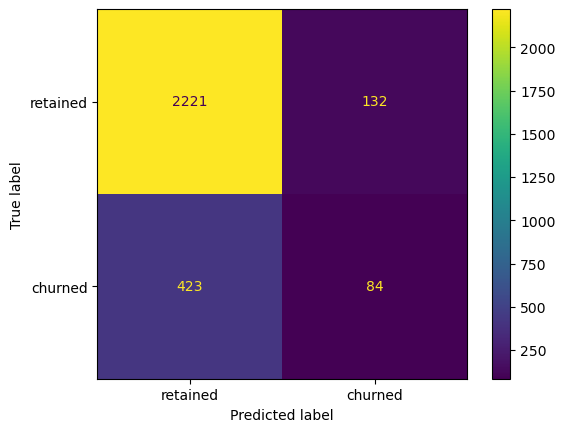

In [73]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels = xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['retained','churned'])
disp.plot()
plt.show()

The model predicted three times as many false negatives than it did false positives, and it correctly identified only 16.6% of the users who actually churned.

### **Task 14. Feature importance**

Use the `plot_importance` function to inspect the most important features of your final model.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

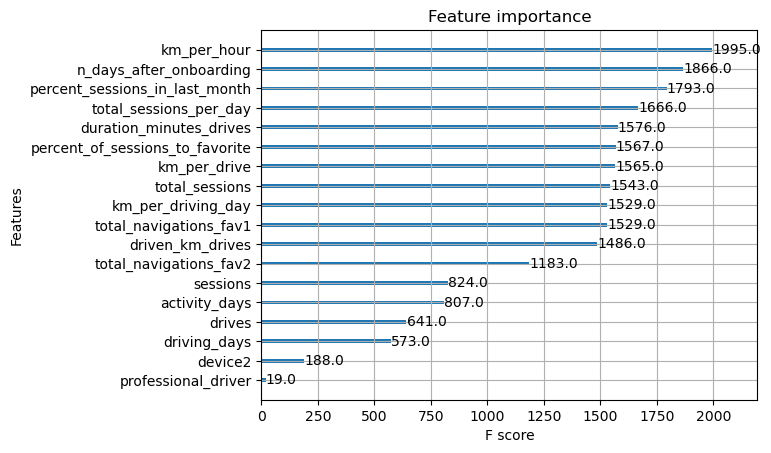

In [76]:
plot_importance(xgb_cv.best_estimator_)

The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (`activity_days`) very heavily in its final prediction.

If anything, this underscores the importance of feature engineering. Notice that engineered features accounted for six of the top 10 features (and three of the top five). Feature engineering is often one of the best and easiest ways to boost model performance.

Also, note that the important features in one model might not be the same as the important features in another model. That's why you shouldn't discount features as unimportant without thoroughly examining them and understanding their relationship with the dependent variable, if possible. These discrepancies between features selected by models are typically caused by complex feature interactions.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.

Even if you cannot use the model to make strong predictions, was the work done in vain? What insights can you report back to stakeholders?

### **Task 15. Conclusion**

Now that you've built and tested your machine learning models, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. Would you recommend using this model for churn prediction? Why or why not?

2. What tradeoff was made by splitting the data into training, validation, and test sets as opposed to just training and test sets?

3. What is the benefit of using a logistic regression model over an ensemble of tree-based models (like random forest or XGBoost) for classification tasks?

4. What is the benefit of using an ensemble of tree-based models like random forest or XGBoost over a logistic regression model for classification tasks?

5. What could you do to improve this model?

6. What additional features would you like to have to help improve the model?

1. I would not recommend using this model for churn prediction since we defined the recall metric as the one we would give most importance and its value is only 16.6% with the XGBoost model on the test data. This leads to a great amount of false negative, which won't allow the Waze company to predict users who churned. From those who really churn, the model can only detect 16.6% of them, which is unnaceptable.

2. By splitting the data into training, validation and test sets, the amount of data available for training was fewer, but by doing this we can also prevent overfitting and we are able to save the test data to be used only of the champion model, opting to just use the validation set to verifiy which model performs better.

3. Logistic regression models are easier to interpret. Because they assign coefficients to predictor variables, they reveal if each feature is positively or negatively correlated with the target in the model's final prediction.

4. Random Forest and XGBoost are often better predictors than logistic regression models. They also require much less data cleaning and require fewer assumptions about the underlying distributions of their predictor variables, so they're easier to work with.

5. To improve this model, I could engineer new features that predict better the user churn. I could also reconstruct the model with less features that may be interfering and try different combinations of predictor variables in order to reduce noise.

6. Some additional features that could improve the model could be geographical location, drive times and also data on about the way the users interact with the app (report or confirm certain events like radars, accidents etc.)
